Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint as pp
sns.set_theme()

Reading the Excel Sheets

In [2]:
excel_file = pd.ExcelFile('./Deidentified Aneurysm Genetics Study Database_20200601.xlsx')
pt_table_og = pd.read_excel(excel_file, 'Sequenced Patient Database')
an_table_og = pd.read_excel(excel_file, 'Sequenced Aneurysm Database')

In [3]:
pp(pt_table_og.columns)

Index(['collaboratorsampleid', 'Subject', 'Date_SampleCollected',
       'BROADBarCode', 'batchnum', 'sex', 'sex_name', 'age', 'smokingstatus',
       'smokingstatus_name', 'familyhistory', 'numaneurysms', 'aneursymtype',
       'an1loc', 'an1vessel', 'an1sizedim1', 'an1sizedim2', 'An1size_dim3',
       'An1_ProcDate', 'an1treatmod', 'an1coilingped', 'an1ruptstatus',
       'an1occlusion', 'hunthess', 'fishergrade', 'an2loc', 'an2vessel',
       'an2sizedim1', 'an2sizedim2', 'an2ruptstatus ', 'an2treatmod',
       'necksize', 'an3loc', 'an3vessel', 'an3sizedim1', 'an3sizedim2',
       'an3ruptstatus', 'an3treatmod', 'Affected member(s)',
       'Follow-up angiogram', 'Aneurysm occluded', 'Smoking Pack-yrs',
       'Comments'],
      dtype='object')


In [4]:
pp(an_table_og.columns)

Index(['BROADBarCode', 'collaboratorsampleid', 'Subject', 'Aneurysm_NumberPt',
       'anloc', 'anvessel', 'andim1', 'andim2', 'andim3', 'An_ProcDate',
       'An_TreatMod', 'An_CoilingPED', 'anruptstatus', 'An1_Occlusion',
       'Notes', 'Unnamed: 15'],
      dtype='object')


### Figure 1a: Aneurysm Treatment Modality

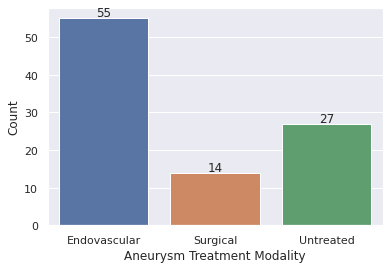

In [38]:
fig_1a1 = sns.countplot(
    x='An_TreatMod',
    data=an_table_og
)
fig_1a1.set(
    xlabel='Aneurysm Treatment Modality',
    ylabel='Count'
)
# Code for adding counts to bars on bar graphs
for p in fig_1a1.patches:
    height = p.get_height()
    fig_1a1.text(p.get_x()+p.get_width()/2.,
                 height + 0.5,
                 '%.0f'%(height),
                 ha = "center")
plt.show()

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_axes': None,
 '_bbox_patch': None,
 '_callbacks': <matplotlib.cbook.CallbackRegistry object at 0x7f57590e4be0>,
 '_clipon': True,
 '_clippath': None,
 '_color': '.15',
 '_contains': None,
 '_fontproperties': <matplotlib.font_manager.FontProperties object at 0x7f57590e4dc0>,
 '_gid': None,
 '_horizontalalignment': '',
 '_in_layout': True,
 '_label': '',
 '_linespacing': 1.2,
 '_mouseover': False,
 '_multialignment': None,
 '_path_effects': [],
 '_picker': None,
 '_rasterized': False,
 '_remove_method': None,
 '_renderer': <matplotlib.backends.backend_agg.RendererAgg object at 0x7f5759179e80>,
 '_rotation': None,
 '_rotation_mode': None,
 '_sketch': None,
 '_snap': None,
 '_stale': True,
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_text': 'Untreated',
 '_transform': <matplotlib.transforms.CompositeGenericTransform object at 0x7f57591384c0>,
 '_transformSet': True,
 '_transform_rotates_text': False,
 '_url': None,
 '_usetex': Fal

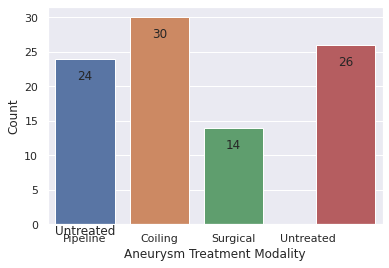

In [97]:
fig_1a2 = sns.countplot(
    x='An_CoilingPED',
    data=an_table_og
)
fig_1a2.set(
    xlabel='Aneurysm Treatment Modality',
    ylabel='Count'
)

offset = 0.5
# Making plot wider
plt.xlim(-0.5, 3.5 + offset) # Original xlim is (-0.5, 3.5)
# Shifting over Untreated bar
untreated_patch = fig_1a2.patches[3]
untreated_patch.set_x(untreated_patch.get_x() + offset)
# Making 'Untreated' label invisible
untreated_label._visible = False
# Creating new 'Untreated' label
new_label = fig_1a2.text(
    0, 0, 'Untreated',
    horizontalalignment = 'center',
    verticalalignment = 'top'
)

pp(vars(untreated_label))

# Code for adding counts to bars on bar graphs
for p in fig_1a2.patches:
    height = p.get_height()
    fig_1a2.text(p.get_x()+p.get_width()/2.,
                 height - 3,
                 '%.0f'%(height),
                 ha = "center")
plt.show()

### Figure 1b: Aneurysm Location

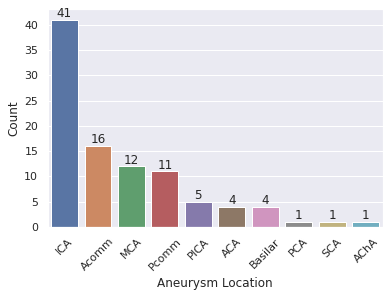

In [25]:
fig_1b = sns.countplot(
    x='anvessel',
    data=an_table_og,
    order=an_table_og['anvessel'].value_counts().index
)
fig_1b.set(
    xlabel='Aneurysm Location',
    ylabel='Count'
)
# Code for adding counts to bars on bar graphs
i = 0
for p in fig_1b.patches:
    height = p.get_height()
    fig_1b.text(p.get_x()+p.get_width()/2.,
                 height + 0.5,
                 an_table_og['anvessel'].value_counts()[i],
                 ha="center")
    i += 1
plt.xticks(rotation=45)
plt.show()

### Figure 1c: Distribution of Aneurysm Sizes, Color-Coded by Rupture Status

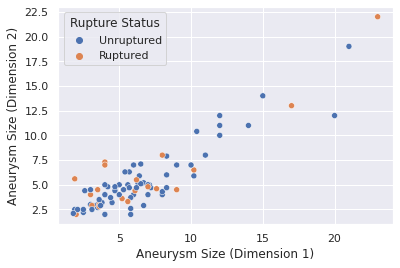

In [87]:
fig_1c = sns.scatterplot(
    x='andim1',
    y='andim2',
    data=an_table_og,
    hue='anruptstatus'
)
fig_1c.set(
    xlabel='Aneurysm Size (Dimension 1)',
    ylabel='Aneurysm Size (Dimension 2)'
)
fig_1c.legend_.set_title('Rupture Status')

### Figure 1d: Smoking Status

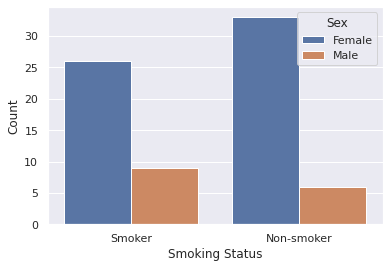

In [88]:
fig_1d = sns.countplot(
    x='smokingstatus_name',
    hue='sex_name',
    data=pt_table_og
)
fig_1d.legend_.set_title('Sex')
fig_1d.set(
    xlabel='Smoking Status',
    ylabel='Count'
)
plt.show()